# Delaware Test Scores: Charter Schools, Income Level, and Racial Equity
By Megan Englert

### The Problem
Charter schools are both prevalent and heavily debated in Delaware. While it makes sense that parents want to be able to choose their child's education, there are not enough charter schools to meet demand right now. Do parents really get to "choose" when they are reliant on their student's scores or a random lottery to be able to actually make that choice? Many people protest charter schools, however, arguing that the per-student funding lost from public schools makes a difference. A few students per grade leaving results in lost funding in many states, but does not decrease the cost of faculty or maintaining the building.

But here's an important question: *Do charter schools actually make a difference?* This report will consider the percentage proficiency from different districts on the Smarter Balanced Standardized Assessment, a common assessment in Delaware meant to measure students' progress. The two datasets used in this report were both collected by the Delaware Depertment of Education. One contains [test data](https://data.delaware.gov/Education/Student-Assessment-Performance/ms6b-mt82), while [the other](https://data.delaware.gov/Education/Delaware-Public-Education-Organization-Directory/p3ez-si4g) will be used to obtain each school's "District Type" for charter vs. non-charter public.

## Data Pre-Processing

In [4]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

#Importing data
data1 = pd.read_csv("C:\\Users\\megan\\Desktop\\CISC367\\Datasets\\Student_Assessment_Performance.csv")
data2 = pd.read_csv("C:\\Users\\megan\\Desktop\\CISC367\\Datasets\\Delaware_Public_Education_Organization_Directory.csv")

# Merging datasets to get district type for each district
data1.head()
types = data2[["District Code","District Type"]]
types = types.drop_duplicates()
combined = pd.merge(types, data1)
# Dropping non-standard and non-charter schools since we are not considering them
combined = combined[combined['District Type']!= "Not Applicable"]
combined.head()

,District Code,District Type,School Year,District,School Code,Organization,Assessment Name,ContentArea,Race,Gender,Grade,SpecialDemo,Geography,SubGroup,RowStatus,Tested,Proficient,PctProficient,ScaleScoreAvg
3646,10,Regular,2015,Caesar Rodney School District,0,Caesar Rodney School District,DCAS Alternate Assessment,ELA,Hispanic/Latino,All Students,3rd Grade,All Students,All Students,Hispanic/Latino/3rd Grade,REDACTED,NaN,NaN,NaN,NaN
3647,10,Regular,2015,Caesar Rodney School District,0,Caesar Rodney School District,DCAS Alternate Assessment,ELA,Hispanic/Latino,All Students,4th Grade,All Students,All Students,Hispanic/Latino/4th Grade,REDACTED,NaN,NaN,NaN,NaN
3648,10,Regular,2015,Caesar Rodney School District,0,Caesar Rodney School District,DCAS Alternate Assessment,ELA,Hispanic/Latino,All Students,5th Grade,All Students,All Students,Hispanic/Latino/5th Grade,REDACTED,NaN,NaN,NaN,NaN
3649,10,Regular,2015,Caesar Rodney School District,0,Caesar Rodney School District,DCAS Alternate Assessment,ELA,Hispanic/Latino,All Students,6th Grade,All Students,All Students,Hispanic/Latino/6th Grade,REDACTED,NaN,NaN,NaN,NaN
3650,10,Regular,2015,Caesar Rodney School District,0,Caesar Rodney School District,DCAS Alternate Assessment,ELA,Hispanic/Latino,All Students,7th Grade,All Students,All Students,Hispanic/Latino/7th Grade,REDACTED,NaN,NaN,NaN,NaN


## Percentage Proficiency

This report is based on the percentage proficient reported for each age group in each demographic. This percentage reflects the number of students who have met or exceeded state standards. The following graph shows the distribution of percent proficient for all students across all districts in DE for the year 2019.

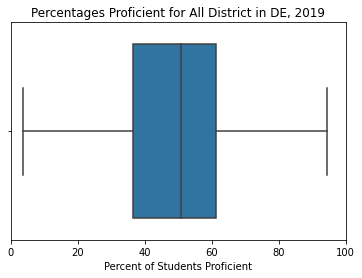

count    340.000000
mean      48.798147
std       18.530959
min        3.680000
25%       36.477500
50%       50.840000
75%       61.312500
max       94.580000
Name: PctProficient, dtype: float64

In [14]:
df_overall = combined[(combined.SubGroup == 'All Students') & 
                      (combined['Assessment Name'] == 'Smarter Balanced Summative Assessment') & 
                      (combined.RowStatus == 'REPORTED') & 
                      (combined['School Year'] == 2019)]
df = df_overall
sns.boxplot(x = 'PctProficient',
           data = df).set(xlim=(0,100))
plt.title("Percentages Proficient for All District in DE, 2019")
plt.xlabel("Percent of Students Proficient")
plt.show()
df.PctProficient.describe()

As we can see, the percentage of proficient students in each district varied extremely greatly, from 3.68% to 94.58%.

## Charter Schools
Now, we will compare regular schools to charter school scores.

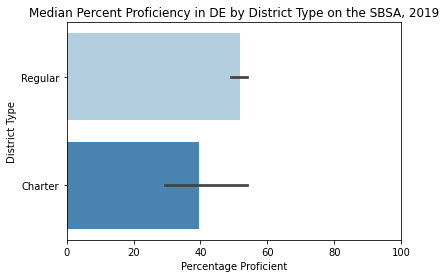

In [18]:
sns.barplot(y = 'District Type',
           x = 'PctProficient',
           data = df,
           palette = 'Blues',
           estimator = np.median).set(xlim=(0,100))
plt.title("Median Percent Proficiency in DE by District Type on the SBSA, 2019")
plt.ylabel("District Type")
plt.xlabel("Percentage Proficient")
plt.show()

Now we will test to see if the difference is as pronounced as it appears.

In [22]:
df_reg = df[df["District Type"] == "Regular"]
df_charter = df[df["District Type"] == "Charter"]
test_stat, p = stats.ttest_ind(df_reg.PctProficient, df_charter.PctProficient)
print("Difference between two independent T's for charter vs. non-charter: ", test_stat, p, p < 0.05)
print("There is no statistically signficant difference in the Percentage Proficient for Charter vs Non-Charter schools on the SBSA.")

Difference between two independent T's for charter vs. non-charter:  1.918579093783365 0.05587968932075212 False
There is no statistically signficant difference in the Percentage Proficient for Charter vs Non-Charter schools on the SBSA.


## Low-Income Students
Since the original dataset does not separate non-low-income students from the population, we technically are unable to make good comparisons with low-income students against the rest of the population. While this is technically incorrect, it is the best we have for now. If anything, it is possible that there may actually be a larger difference, since one of the datasets contains the other.

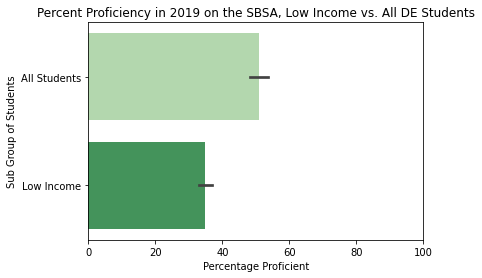

In [25]:
df_low_inc = combined[((combined.SubGroup == 'Low Income') | (combined.SubGroup == 'All Students'))
                      & (combined['Assessment Name'] == 'Smarter Balanced Summative Assessment') 
                      & (combined.RowStatus == 'REPORTED') 
                      & (combined['School Year'] == 2019)]
df = df_low_inc
sns.barplot(y = 'SubGroup',
           x = 'PctProficient',
           data = df,
           palette = 'Greens',
           estimator = np.median).set(xlim=(0,100))
plt.title("Percent Proficiency in 2019 on the SBSA, Low Income vs. All DE Students")
plt.xlabel("Percentage Proficient")
plt.ylabel("Sub Group of Students")
plt.show()

In [29]:
df_all = df[df["SubGroup"] == "All Students"]
df_low = df[df["SubGroup"] == "Low Income"]
test_stat, p = stats.ttest_ind(df_all.PctProficient, df_low.PctProficient)
print("Difference between two independent T's for low income vs. all students: ", test_stat, p, p < 0.05)
print("There is a statistically significant difference between percent proficiency for low income and all students in Delaware.")
print("A randomly selected student from the entire student population is", df_all.PctProficient.mean()/df_low.PctProficient.mean(), "more likely to be proficient on the SBSA than a student from the low-income population.")

Difference between two independent T's for low income vs. all students:  9.604673535469209 1.496920853483063e-20 True
There is a statistically significant difference between percent proficiency for low income and all students in Delaware.
A randomly selected student from the entire student population is 1.3537382901260329 more likely to be proficient on the SBSA than a student from the low-income population.


## Charter Schools and Low-Income

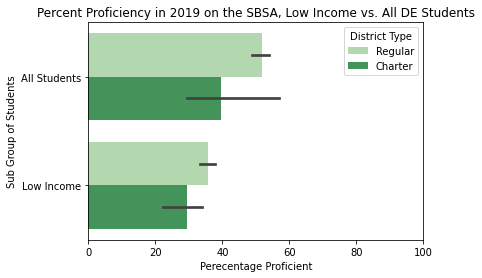

In [31]:
sns.barplot(y = 'SubGroup',
           x = 'PctProficient',
           hue = 'District Type',
           data = df,
           palette = 'Greens',
           estimator = np.median).set(xlim=(0,100))
plt.title("Percent Proficiency in 2019 on the SBSA, Low Income vs. All DE Students")
plt.ylabel("Sub Group of Students")
plt.xlabel("Perecentage Proficient")
plt.show()

In [34]:
df_low_reg = df_low[df_low["District Type"] == "Regular"]
df_low_charter = df_low[df_low["District Type"] == "Charter"]
test_stat, p = stats.ttest_ind(df_low_reg.PctProficient, df_low_charter.PctProficient)
print("Difference between two independent T's for low income students, regular vs. charter: ", test_stat, p, p < 0.05)
print("There is no statistically significant difference in percentage proficient on the SBSA for low income students depending on whether they attend charter or regular school.")

Difference between two independent T's for low income students, regular vs. charter:  1.2057966270561442 0.22875975077464558 False
There is no statistically significant difference in percentage proficient on the SBSA for low income students depending on whether they attend charter or regular school.


While low-income charter school attendees had the lowest amount of percentage proficient, there is no statistical significance for low income students depending on whether they attend a